In [5]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
num_of_samples=10
num_of_upsamples=[]
factor_of_sampling=[]
for i in range(10,40):
    num_of_upsamples.append(i)
    factor_of_sampling.append((i)/float(num_of_samples))

In [9]:
msq=[]
def upsample(x,s):
    y=[]
    upsampled_by=s/float(num_of_samples)
    for i in  range(s):
        floor=math.floor((i)/upsampled_by)
        ceil=math.ceil((i)/upsampled_by)
        try:
            if floor != ceil:
                value=x[floor]+(x[ceil]-x[floor])*(i/upsampled_by-floor)/(ceil-floor)
            else:
                value=x[floor]
        except Exception as e:
            value=x[floor]+(0-x[floor])*((i)/upsampled_by-floor)/(ceil-floor)
        y.append(value)

    t=[]
    xori=[]
    for i in range(s):
        xori.append(math.sin(math.radians(360*i/s)))    
    for i in range(len(y)):
        t.append(i)
    
#    plt.plot(t,xori)
#    plt.stem(t,y)
    error=np.mean(((np.array(xori)-np.array(y)))**2)
    msq.append(error)
#     print('mean square error by interpolation = ',msq)
    return y

In [7]:
x1=[]
for sample in num_of_upsamples:    
    for i in range(num_of_samples):
        x1.append(math.sin(math.radians(360*(i)/num_of_samples)))
    upsample(x1,sample)

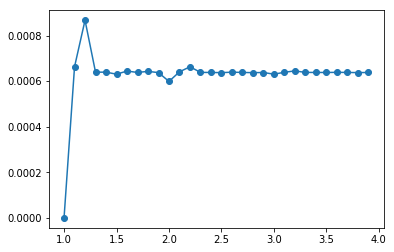

In [8]:
plt.plot(np.array(factor_of_sampling),np.array(msq),'-o')